In [75]:
from mnist import MNIST
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import cv2

In [77]:
def k_means_classifier(test_images,test_labels,mean,K):
  """
  Input: 
  test_images, test labels -- Images and their corresponding labels for testing the model
  mean -- contains the mean values of mixture components 
  K    -- no of mixture components
  """  
  K=K  
  mis_clf=0   
  #print(np.shape(test_images))
  predicted_label=np.zeros((len(test_images)))    #to store the predicted label for each image
  #print(np.shape(predicted_label))

  for i in range(len(test_labels)):
    temp_image=np.array(test_images[i][:])   #load the feature vector of particular image that needs to be classified
    temp_image=np.reshape(temp_image,(1,784))
    min_dist=np.zeros((np.max(test_labels)+1,1))
    for j in range(np.max(test_labels)+1):
        min_dist_class=np.zeros((K,1))
        for k in range(K):
            temp_image_dist=temp_image-mean["class"+str(j)][k,:]
            #print(np.max(mean_avg["class"+str(j)]))
            
            #find the distance of the image from each mixture component of each class
            min_dist_class[k]=np.linalg.norm(temp_image_dist) 
        
        min_dist[j]=np.min(min_dist_class)  #store the distance  that is minimum among all the mixture components 
    
    #print(min_dist)
    #the image belongs to the class such that the image distance is min. from one of the mixture component of a class
    predicted_label[i]=np.argmin(min_dist)  
    
    if predicted_label[i]!=test_labels[i]:
        mis_clf+=1
        #print(i,mis_clf,predicted_label[i],test_labels[i])                 #to print the predicted class and ture class of a mis-classified image

  #print(np.shape(predicted_label))
  test_labels=np.array(test_labels)
  print(f"No. of miss classifications is :{mis_clf}")
  miss_classf_error=(mis_clf/len(test_labels))*100
  print(f"% miss classification error is : {str(round(miss_classf_error,2))}%")
  #to create the confusion matrix    
  conf_matrix=confusion_matrix(test_labels,predicted_label)       #to create the confusion matrix
  
  return conf_matrix,mis_clf

        
    
    
    

### LOAD THE MNIST DATA AND CLASSIFFY THE DATA TO THEIR RESPECTIVE CLASSES

In [78]:
"""Extract MNIST data from the specified folder. mndata has images of numbers 0-9 with their respective labels.

    train_images -- training set represented by a numpy array of shape (no of images=60000,size of each image=784 )
    train_labels -- training labels represented by a numpy array (vector) of shape (no of images=60000,1)
    test_images  -- test set represented by a numpy array of shape (no of images=10000,size of each image=784)
    test_labels  -- test labels represented by a numpy array (vector) of shape (no of images=10000,1)
"""

mndata=MNIST(r"Dataset_spr_2")

train_images, train_labels=mndata.load_training()      #loads training images and their labels
test_images, test_labels=mndata.load_testing()     #loads testing images and their labels
test_images=np.array(test_images)
#print(np.shape(test_images))

"""to convert gray scale image to binary image"""
train_images=np.array(train_images)
train_images=np.where(train_images > 127, 1,0 )
test_images=np.array(test_images)
test_images=np.where(test_images > 127, 1,0 )

"""classes -- list with each item containing images of that particular class """

train_size=len(train_labels)     #no. of images in training set
test_size=len(test_labels)       #no. of images in testing set
img_size=train_images.shape[1]

N_class=np.max(train_labels)+1   #total no. of classes
all_classes=[[] for i in range(N_class)]  
for i in range(train_size):
      all_classes[train_labels[i]].append(train_images[i]) # the images with label k is added to the class k. 

K=3  #no. of mixture components
n_img=500 #no. of images from each set
class_no=np.array([2,3,4])
classes=np.array(all_classes[class_no[0]][:n_img][:])
for i in range(len(class_no)-1):
    classes=np.append(classes,all_classes[class_no[i+1]][:n_img][:],axis=0)
# classes=np.append(classes,all_classes[4][:200][:],axis=0)
classes=np.random.permutation(classes)


#to check whether the images are shuffled or not
# train_image=classes[10,:]
# #train_image=np.where(train_image>0.5,1, 0)
# train_image=np.reshape(train_image,(28,28))
# #train_imag1=train_imag1.reshape(int(np.sqrt(len(train_imag1))),int(np.sqrt(len(train_imag1))))
# plt.imshow(train_image)
# plt.axis('off')

# classes_labels=2*np.ones(200)
# classes_labels=np.append(classes_labels,3*np.ones(200))
# classes_labels=np.append(classes_labels,4*np.ones(200))

#print(np.shape(classes))



### Run the below code to implement k-means clustering

Images constructed using mean values of each bin


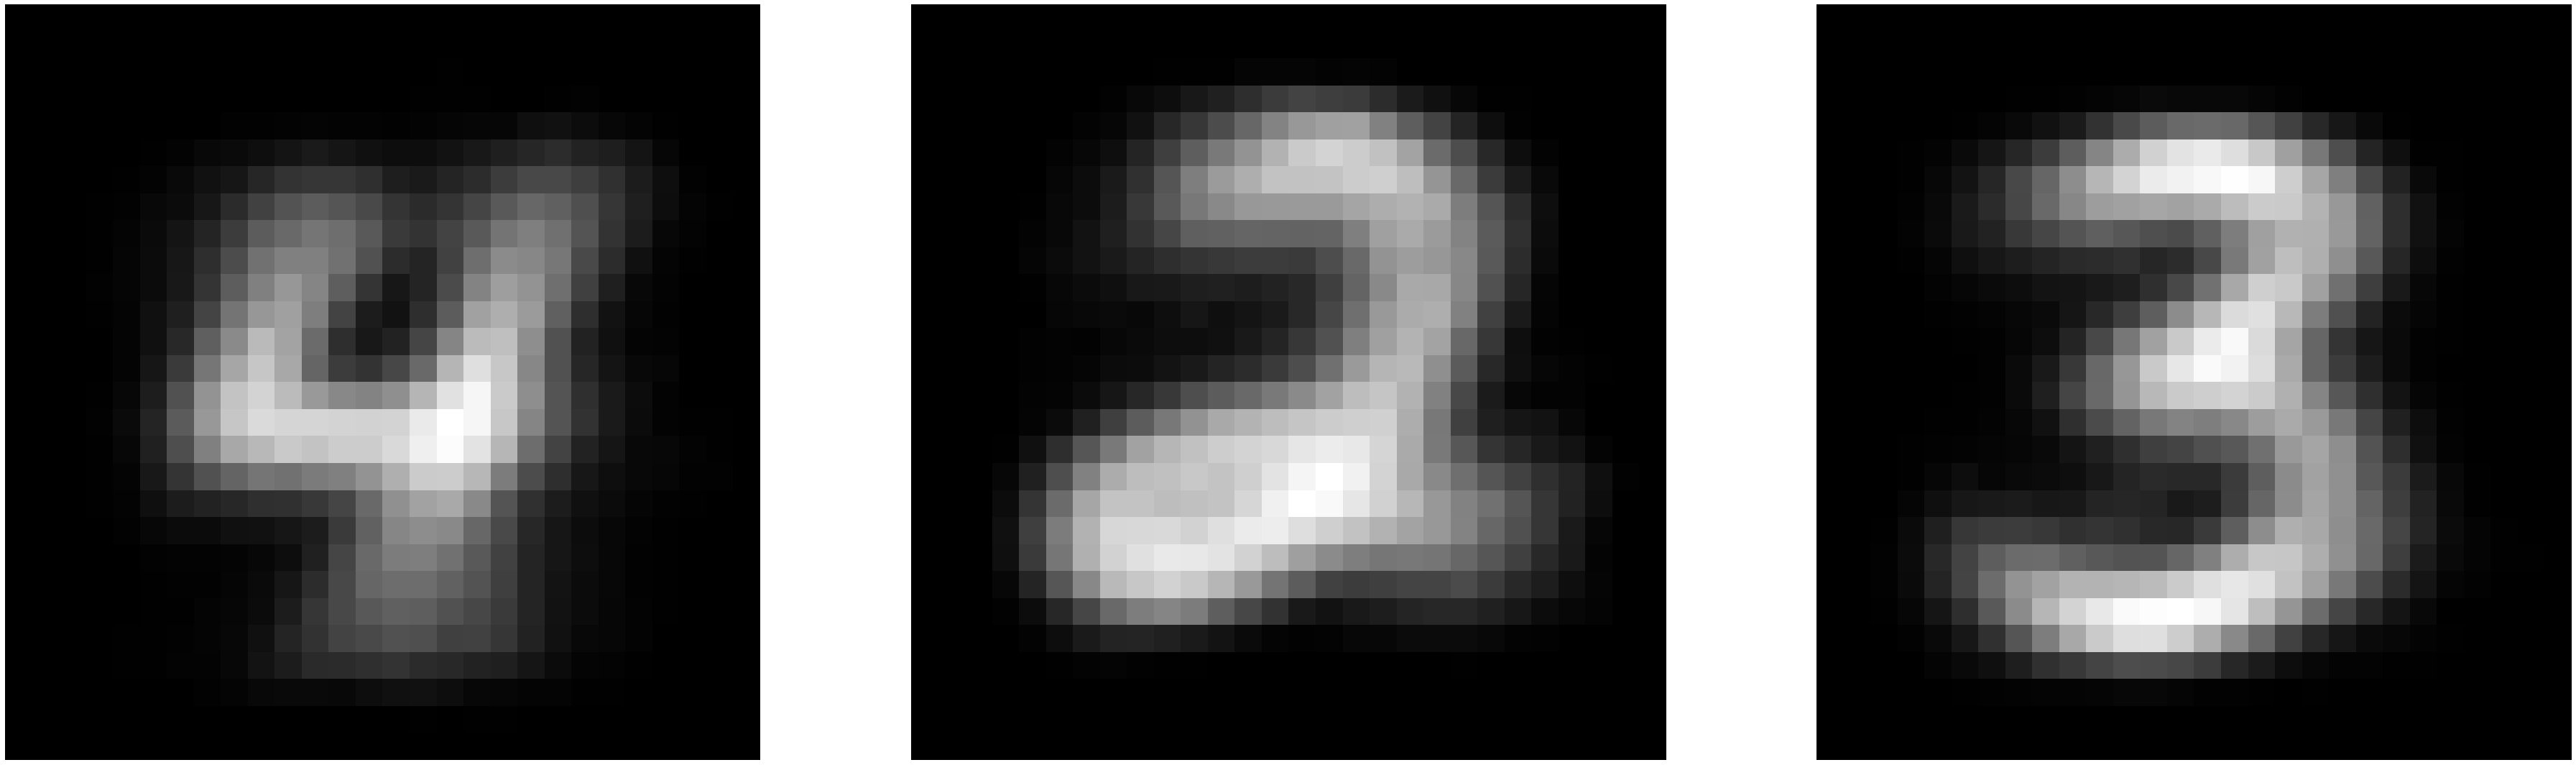

In [84]:
iterations=10   #no. of iterations
#random initialisation of latent variables
#for i in range(np.max(train_labels)+1):

#random initialisation of images to any one of the k-bins
z=np.random.randint(0,K,size=(classes.shape[0],1))
tot_err=np.zeros((iterations,1))

for itr in range(iterations):
    mu=np.zeros((K,784))
    xi_s=classes
    xi_s=np.array(xi_s)

    #print(np.shape(xi_s))
    err=np.zeros((K,1))
    for k in range(K):
        z_d=np.where(z==k,1,0)
        z_d=z_d.T

        #find the mean value of kth mixture component using the images that belong to the kth mixture
        mu_k=(z_d@xi_s)/(np.sum(z_d))    
        mu_k=np.reshape(mu_k,(1,784))
        
        mu[k,:]=mu_k

        error=z_d@(xi_s-mu_k)
        err[k]=err[k]+np.linalg.norm(error)
   

    for n in range(len(xi_s)):
        xn=xi_s[n][:]-mu
        #print(np.shape(xn))
        min_dist=np.linalg.norm(xn,axis=1)
 
        z[n]=np.argmin(min_dist)  #store the distance  that is minimum among all the mixture components 
    
    #print(min_dist)
    
    #reassignment of images to different bins based on the min. distance of the image from the mean
    z[n]=np.argmin(min_dist)
    #print(min_dist)

    total_err=np.sum(err)
    #print(f"total error : {total_err}")

#     for n in range(len(xi_s)):
#         temp_image=np.array(xi_s[i][:])   #load the feature vector of particular image that needs to be classified
#         temp_image=np.reshape(temp_image,(1,784))
#         min_dist=np.zeros((K,1))
        
#         for k in range(K):
#             temp_image_dist=temp_image-mu[k,:]
#             #print(np.max(mean_avg["class"+str(j)]))
            
#             #find the distance of the image from each mixture component
#             min_dist[k]=np.linalg.norm(temp_image_dist) 
        
#         z[n]=np.argmin(min_dist)  #store the distance  that is minimum among all the mixture components 
    
    if total_err<1e-20:
      print(f"The iteration no. at which the total_err is less than 1e-20 is {total_err}: corresponding iteration is {itr}")
      break
    
#plot the images for each class using the avearge mean obtained by taking mean over all mixture components
plt.figure(figsize=(64,64))  
print("Images constructed using mean values of each bin")
for i in range(K):
    plt.subplot(1,K,i+1)
    train_image=mu[i,:]
    #train_imag1=np.where(train_imag1>0.5,1, 0)
    train_image=np.reshape(train_image,(28,28))
    #train_imag1=train_imag1.reshape(int(np.sqrt(len(train_imag1))),int(np.sqrt(len(train_imag1))))
    plt.imshow(train_image,cmap='gray')
    plt.axis('off')
 

    
# #k-means classifier using the mean values obtained from k-means clustering
# confuse_matrix,mis_classification=k_means_classifier(test_images,test_labels,mu,K)
# plot_cnf_matrix(confuse_matrix)    